In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
df = pd.read_csv('mortgage.csv')

In [6]:
print (df.head())

   id  time  orig_time  first_time  mat_time  balance_time   LTV_time  \
0   1    25         -7          25       113      41303.42  24.498336   
1   1    26         -7          25       113      41061.95  24.483867   
2   1    27         -7          25       113      40804.42  24.626795   
3   1    28         -7          25       113      40483.89  24.735883   
4   1    29         -7          25       113      40367.06  24.925476   

   interest_rate_time  hpi_time  gdp_time     ...       REtype_SF_orig_time  \
0                 9.2    226.29  2.899137     ...                       1.0   
1                 9.2    225.10  2.151365     ...                       1.0   
2                 9.2    222.39  2.361722     ...                       1.0   
3                 9.2    219.67  1.229172     ...                       1.0   
4                 9.2    217.37  1.692969     ...                       1.0   

   investor_orig_time  balance_orig_time  FICO_orig_time  LTV_orig_time  \
0          

In [7]:
print(len(df))

598073


In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df.isnull().sum()

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
dtype: int64

In [10]:
from sklearn.cluster import KMeans


In [11]:
mat = df.values
# Using sklearn
km = KMeans(n_clusters=5)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_


In [14]:
mat

array([[ 1.00000000e+00,  2.50000000e+01, -7.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.60000000e+01, -7.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  2.70000000e+01, -7.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.73460000e+04,  4.80000000e+01,  3.80000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.73460000e+04,  4.90000000e+01,  3.80000000e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.73460000e+04,  5.00000000e+01,  3.80000000e+01, ...,
         2.44000722e-02,  4.35014513e-02,  1.11402975e-01]])

In [19]:
results = pd.DataFrame([df.index,labels]).T
results


,0,1
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [15]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans
score = [kmeans[i].fit(mat).score(mat) for i in range(len(kmeans))]

score

plt.plot(Nc,score)

plt.xlabel('Number of Clusters')

plt.ylabel('Score')

plt.title('Elbow Curve')

plt.show()

KeyboardInterrupt: 

In [16]:
from sklearn.preprocessing import StandardScaler
features =list(df)
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = list(labels)
# Standardizing the features
x = StandardScaler().fit_transform(x)


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [20]:
finalDf = pd.concat([principalDf,results[1]],axis=1)

In [21]:
finalDf

,principal component 1,principal component 2,1
0,-5.449881,-0.162822,0
1,-5.350572,-0.272282,0
2,-5.361962,-0.254263,0
3,-5.190592,-0.454626,0
4,-5.201823,-0.435819,0
5,-5.166828,-0.480858,0
6,-5.002170,-0.697750,0
7,-4.784850,-1.015676,0
8,-4.702877,-1.127795,0
9,-4.419433,-1.479567,0


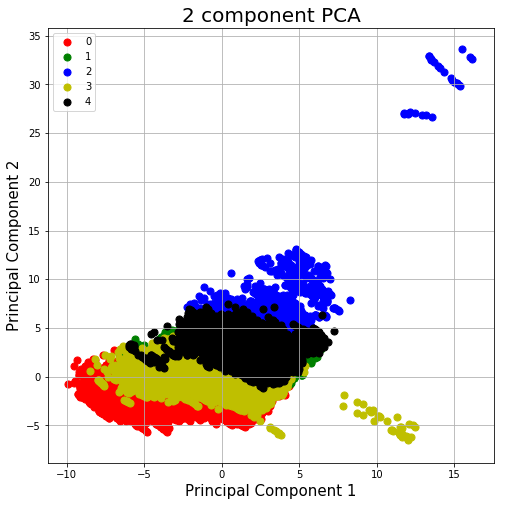

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','y','black']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[1] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
finalDf[1]

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
598043    0
598044    0
598045    0
598046    0
598047    0
598048    0
598049    0
598050    0
598051    0
598052    0
598053    0
598054    0
598055    0
598056    0
598057    0
598058    0
598059    0
598060    0
598061    0
598062    0
598063    0
598064    0
598065    0
598066    0
598067    0
598068    0
598069    0
598070    0
598071    0
598072    0
Name: 1, Length: 598073, dtype: int64